### Using the ES and Holt-Winter's Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
BTC_Data = pd.read_csv("../data/BTC_1d_price.csv")
BTC_Data.set_index("open_time", inplace=True, drop=True)
BTC_Data.rename(columns={"close": "Close"}, inplace=True)

In [3]:
BTC_Data.index = pd.to_datetime(BTC_Data.index)

### Smoothing Methods - Exponential Smoothing

In [4]:
btc_data = BTC_Data[["Close"]]
train = btc_data.iloc[:-100, :]
train = train.resample("D").sum()
test = btc_data.iloc[-100:, :]
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
pred = test.copy()

In [5]:
model = SimpleExpSmoothing(train['Close'])
model._index = pd.to_datetime(train.index)

fit1 = model.fit()
pred1 = fit1.forecast(100)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(100)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(100)

/opt/homebrew/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


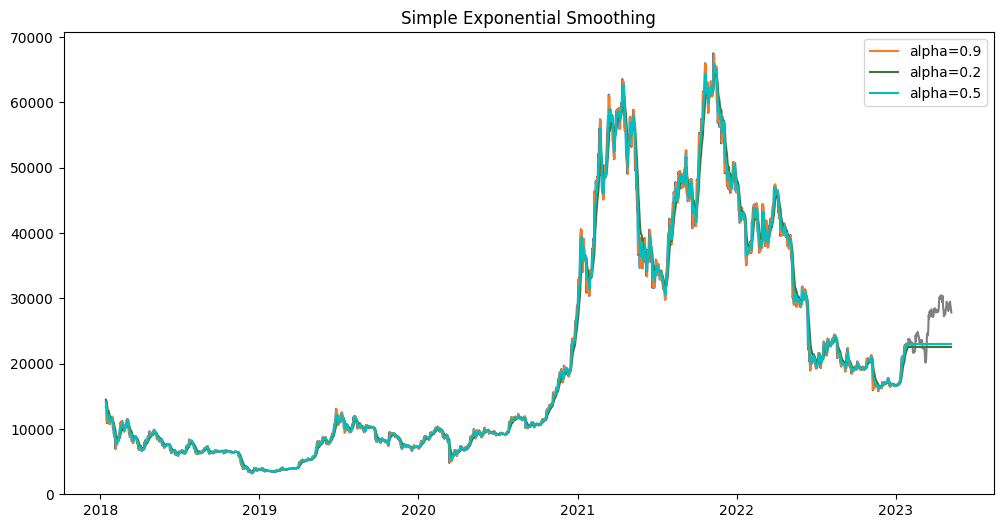

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[150:], train.values[150:])
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend()

### Holt Exponential Smoothing

/opt/homebrew/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


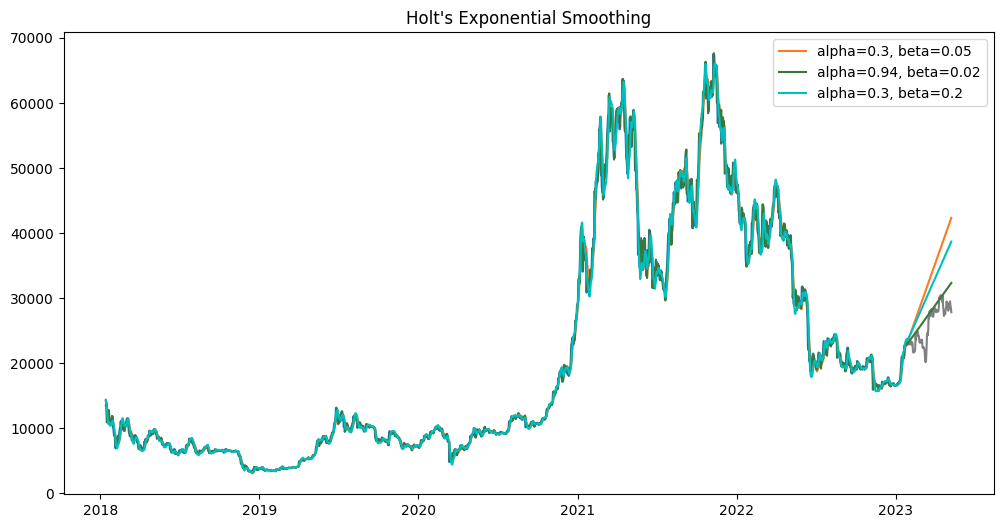

In [9]:
model = Holt(train['Close'])
model._index = pd.to_datetime(train.index)

fit1 = model.fit(smoothing_level=.3, smoothing_trend=.05)
pred1 = fit1.forecast(100)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(100)
fit3 = model.fit(smoothing_level=.3, smoothing_trend=.2)
pred3 = fit3.forecast(100)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[150:], train.values[150:])
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_trend'])[:4], color=c)
plt.title("Holt's Exponential Smoothing")
plt.legend()

### Holt's Damped Trend

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


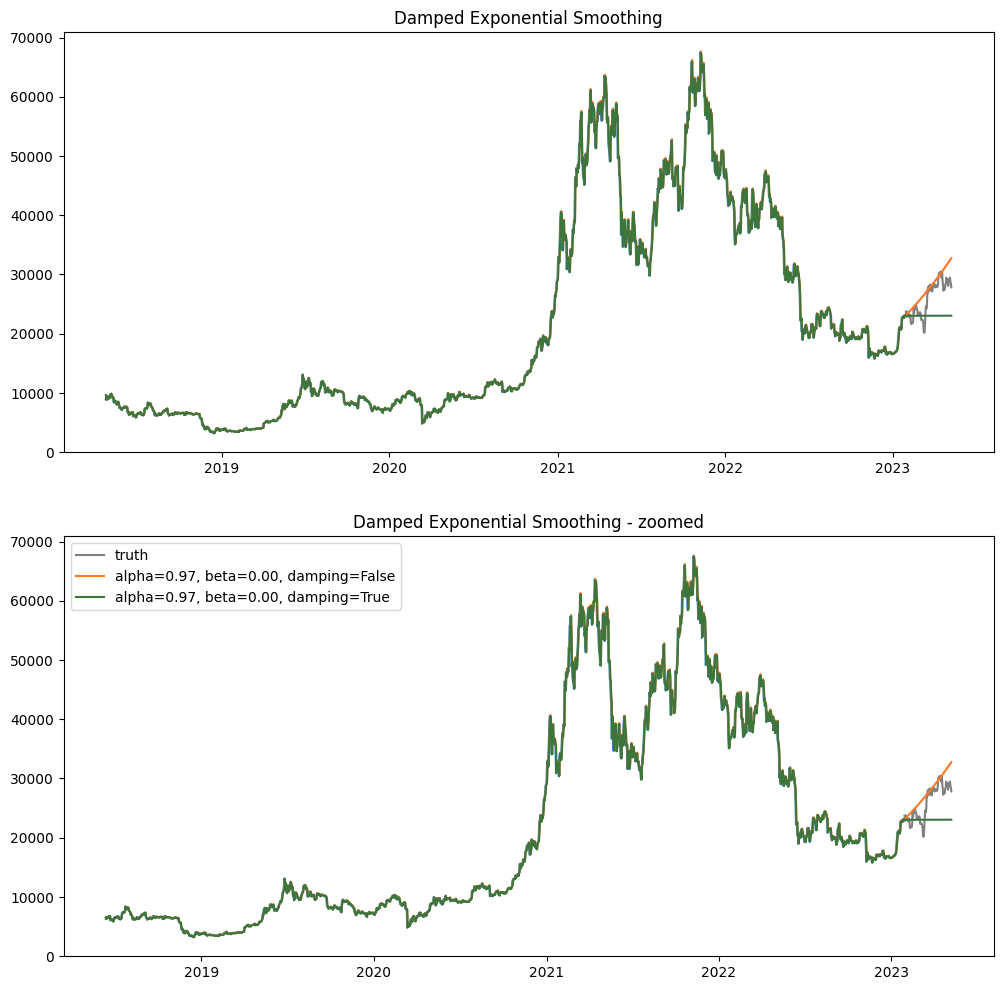

In [14]:
model = ExponentialSmoothing(np.asarray(train['Close']), trend='mul', seasonal=None)
model2 = ExponentialSmoothing(np.asarray(train['Close']), trend='mul', seasonal=None, damped_trend=True)
model._index = pd.to_datetime(train.index)

fit1 = model.fit()
fit2 = model2.fit()
pred1 = fit1.forecast(100)
pred2 = fit2.forecast(100)

fig, ax = plt.subplots(2, figsize=(12, 12))
ax[0].plot(train.index[250:], train.values[250:])
ax[0].plot(test.index, test.values, color="gray", label="truth")
ax[1].plot(train.index[300:], train.values[300:])
ax[1].plot(test.index, test.values, color="gray", label="truth")
for p, f, c in zip((pred1, pred2),(fit1, fit2),('#ff7823','#3c763d')):
    ax[0].plot(train.index[250:], f.fittedvalues[250:], color=c)
    ax[1].plot(train.index[300:], f.fittedvalues[300:], color=c)
    ax[0].plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_trend'])[:4]+ ", damping="+str(True if f.params['damping_trend']>0 else False), color=c)
    ax[1].plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_trend'])[:4]+ ", damping="+str(True if f.params['damping_trend']>0 else False), color=c)
ax[0].set_title("Damped Exponential Smoothing")
ax[1].set_title("Damped Exponential Smoothing - zoomed")
plt.legend()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


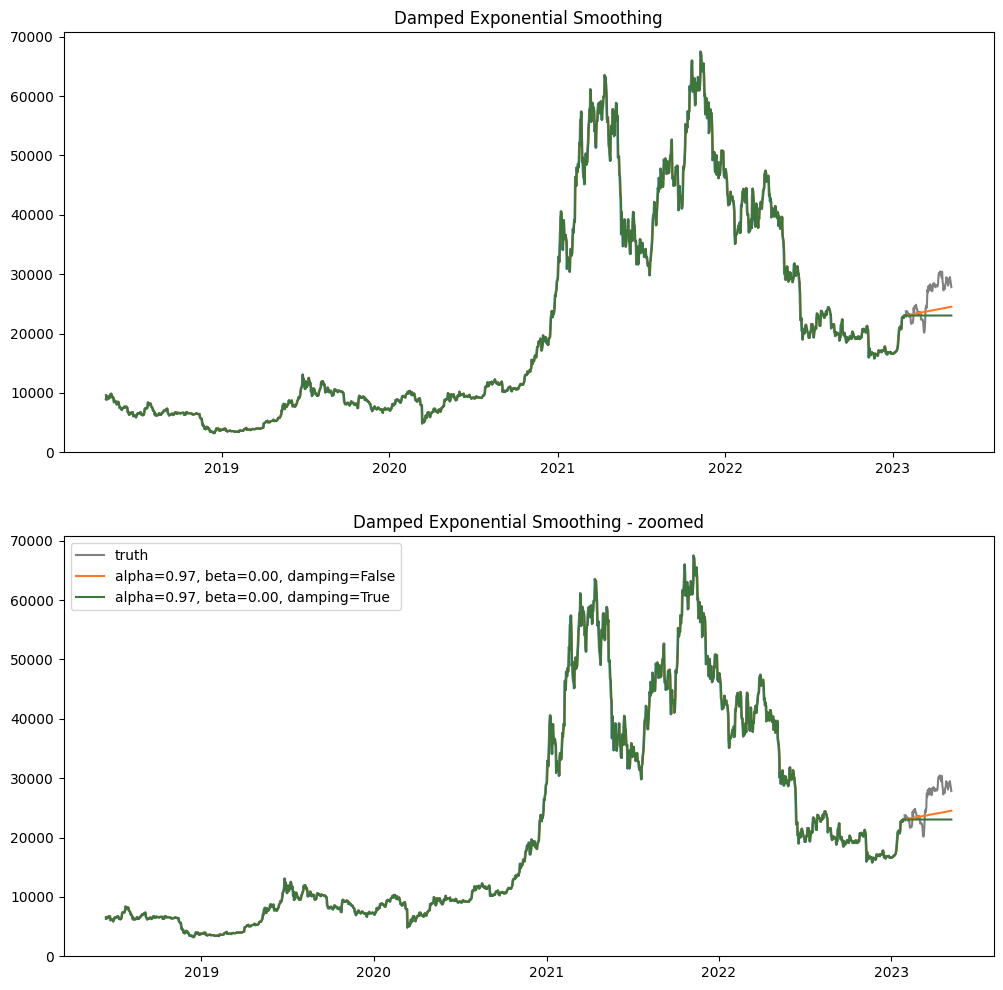

In [15]:
model = ExponentialSmoothing(np.asarray(train['Close']), trend='add', seasonal=None)
model2 = ExponentialSmoothing(np.asarray(train['Close']), trend='add', seasonal=None, damped_trend=True)
model._index = pd.to_datetime(train.index)

fit1 = model.fit()
fit2 = model2.fit()
pred1 = fit1.forecast(100)
pred2 = fit2.forecast(100)

fig, ax = plt.subplots(2, figsize=(12, 12))
ax[0].plot(train.index[250:], train.values[250:])
ax[0].plot(test.index, test.values, color="gray", label="truth")
ax[1].plot(train.index[300:], train.values[300:])
ax[1].plot(test.index, test.values, color="gray", label="truth")
for p, f, c in zip((pred1, pred2),(fit1, fit2),('#ff7823','#3c763d')):
    ax[0].plot(train.index[250:], f.fittedvalues[250:], color=c)
    ax[1].plot(train.index[300:], f.fittedvalues[300:], color=c)
    ax[0].plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_trend'])[:4]+ ", damping="+str(True if f.params['damping_trend']>0 else False), color=c)
    ax[1].plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_trend'])[:4]+ ", damping="+str(True if f.params['damping_trend']>0 else False), color=c)
ax[0].set_title("Damped Exponential Smoothing")
ax[1].set_title("Damped Exponential Smoothing - zoomed")
plt.legend()

### Holt-Winter's Seasonal Procedure

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, "Holt-Winter's Seasonal Smoothing")

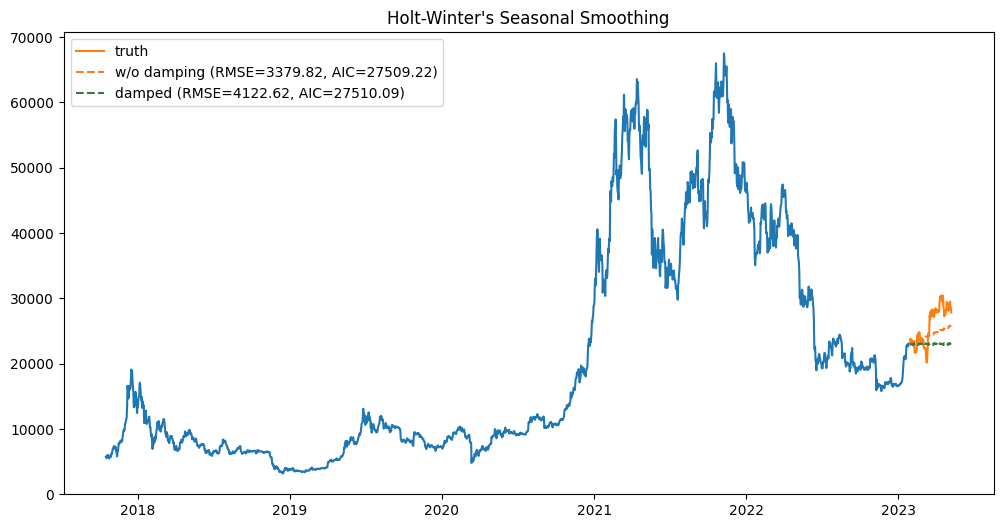

In [16]:
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped_trend=True)
fit = model.fit()
pred = fit.forecast(100)
fit2 = model2.fit()
pred2 = fit2.forecast(100)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[60:], train.values[60:])
ax.plot(test.index, test.values, label='truth')
ax.plot(test.index, pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic))
ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic))
ax.legend()
ax.set_title("Holt-Winter's Seasonal Smoothing")

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, "Holt-Winter's Seasonal Smoothing")

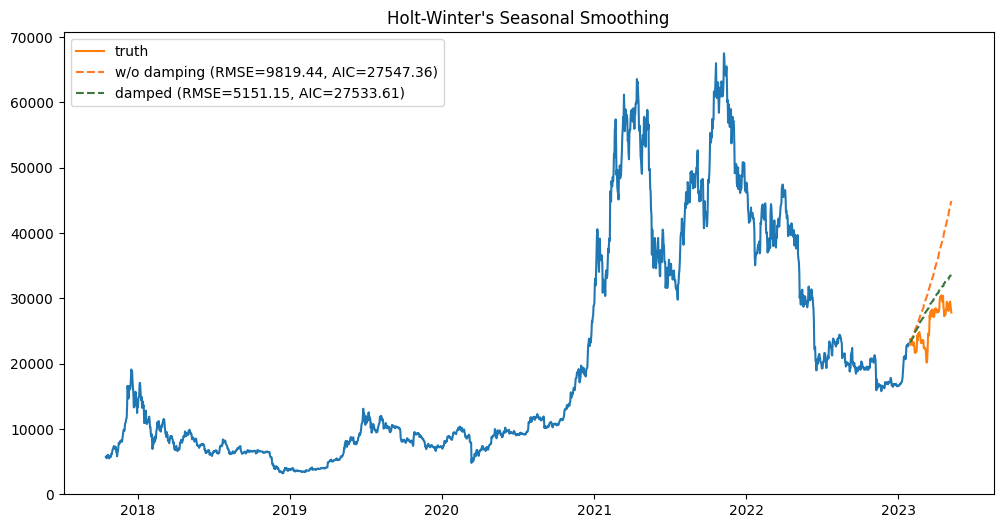

In [17]:
model = ExponentialSmoothing(train, trend="mul", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="mul", seasonal="add", seasonal_periods=12, damped_trend=True)
fit = model.fit()
pred = fit.forecast(100)
fit2 = model2.fit()
pred2 = fit2.forecast(100)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[60:], train.values[60:])
ax.plot(test.index, test.values, label='truth')
ax.plot(test.index, pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic))
ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic))
ax.legend()
ax.set_title("Holt-Winter's Seasonal Smoothing")

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, "Holt-Winter's Seasonal Smoothing")

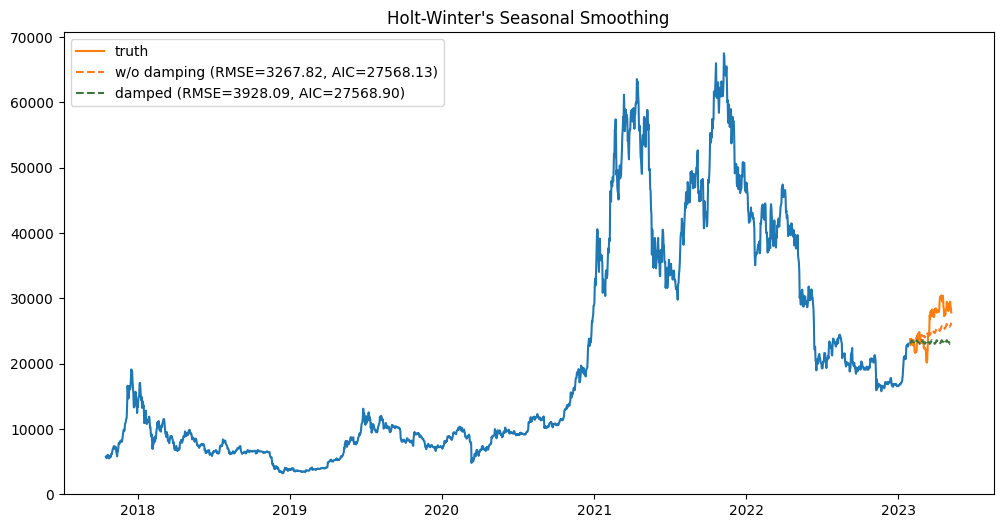

In [18]:
model = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=12, damped_trend=True)
fit = model.fit()
pred = fit.forecast(100)
fit2 = model2.fit()
pred2 = fit2.forecast(100)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[60:], train.values[60:])
ax.plot(test.index, test.values, label='truth')
ax.plot(test.index, pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic))
ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic))
ax.legend()
ax.set_title("Holt-Winter's Seasonal Smoothing")

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, "Holt-Winter's Seasonal Smoothing")

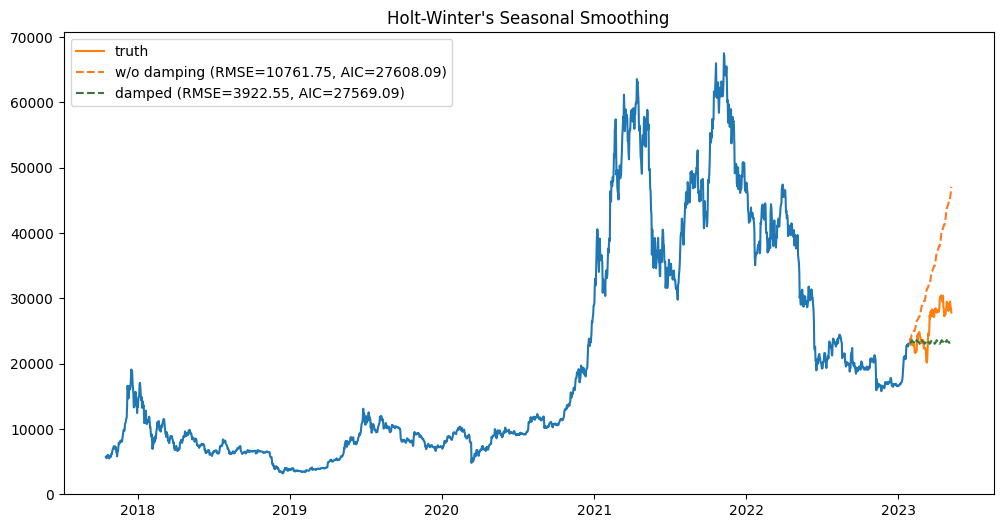

In [19]:
model = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12, damped_trend=True)
fit = model.fit()
pred = fit.forecast(100)
fit2 = model2.fit()
pred2 = fit2.forecast(100)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[60:], train.values[60:])
ax.plot(test.index, test.values, label='truth')
ax.plot(test.index, pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic))
ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic))
ax.legend()
ax.set_title("Holt-Winter's Seasonal Smoothing")